# PARCIAL 1 CORTE
### Marcel Parada Villamizar
1. Quitar la linea base 
2. Buscar el pico de cada pulso
3. calcular la carga 
4. aplicar el criterio de  Q/P
5. Hallar el delta tiempo

In [26]:
#Aqui tomamos todos los datos de todos los bines y los tiempos, ademas de que quitamos la linea base; 
#por tanto se le resta -50 y con esto tenemos el verdadero valor de cada pulso

import bz2
from numpy import zeros
from pylab import *

n = 0
lista=[]
lista_deltiempo=[]
#with bz2.open( input ("Please, enter the filename: "), "rt" ) as bz_file:

with bz2.open("Chitaga_2016_08_12_12h00.dat.bz2", "rt" ) as bz_file:

     for line in bz_file:
        rline = line.rstrip('\n').split(' ')
        if len(rline)==3:
            if rline[0]=="#":
                ln=0
                #lista.append(int(rline[3]))
            if rline[0]!="#":
                if ln >= 0: 
                 
                    lista.append(int(rline[0])-50)
        if len(rline)==4:
            if rline[0]=="#" and rline[1]== "t":
                ln=0
                lista_deltiempo.append(int(rline[3]))
                    
               # else:
                   # ln += 1                    
            #print( rline[0],rline[1],rline[2],)
            #print("lista",lista)
        n += 1
        #if n == 91:
           #break
            

In [28]:
#print("lista",lista)
#print(" lista del contador del tiempo es: ", lista_deltiempo)
print(" la longitud del el contador de tiempo", len(lista_deltiempo))
print((len(lista)-9), int(len(lista)/12 - 9) )

 la longitud del el contador de tiempo 749617
8995511 749617


In [29]:
#Creamos una función la cual nos permite crear una lista de cada 12 pulsos se parados,
#y aquellas que no cumplen no serán tomadas; una vez teniendo la lista de los 12 pulsos

def funcion(n,r,m):
    lista=[]
    for i in range(r,m):
        lista.append(n[i])
    return(lista)
n=0
n1=12

y1=int(len(lista)/12)-9
print(y1)
tnuevo=[]
for i in range(y1):
    tnuevo.append(funcion(lista,n,n1))
    
    n=n+12
    n1=n1+12
#print("\n lista que separa los pulsos 12 datos: \n ",tnuevo)

#buscamos el pico mayor de cada pulso y lo guardamos en una nueva lista llamado Picos
Picos=[]
for k in range(y1):
    Picos.append(max(tnuevo[k]))
#print("los valores maximos de picos son: ",Picos)
print("\n la longitud de la lista de los picos: \n",len(Picos))

             



749617

 la longitud de la lista de los picos: 
 749617


In [30]:
#Como ya tenemos una lista de lista, y cada una de 12, sumamos los pulsos con el fin de obtener la sumatoria de los
#voltajes y asi tener la carga es decir Q; una vez obtenido este Q se guardará en una lista. Luego aplicamos
#el criterio Q/P>2 para ver que tiempos son validos y esos tiempos son los que guardamos.

def funcion(n,r,m):
    lista=[]
    x=0
    for i in range(r,m):
        x=x+n[i]
    
    return(x)
n=0
n1=12
#y=int(len(lista)/12)
#print(y)
Q=[]
for i in range(y1):
    Q.append(funcion(lista,n,n1))
    n=n+12
    n1=n1+12
    
#print( "\n El valor de la carga  con valores con la linea base es: \n ",Q)
print("la longitud del vector de la carga es: ",len(Q))
#hallemos el valor q/p

qp=[]
qpno=[]
listadelttiem=[]
for i in range(y1):
    f=Q[i]/Picos[i]
    if f > 2:
        qp.append(f)
        listadelttiem.append(lista_deltiempo[i])
    else:
        qpno.append(f)

        
#print("\n Los siguientes valores en la lista son señales: \n",qp)
#print("\n la lista de contadores de tiempo que cumplen el criterio  anterior es: \n",listadelttiem)
#print("\n Los siguientes valores en la lista no son señales: \n",qpno)       
#print(" el valor maximo es : ", max(qp))
#plot(qp)
#show()
#print()

la longitud del vector de la carga es:  749617


El valor maximo es:  31259296
El valor minimo es:  15


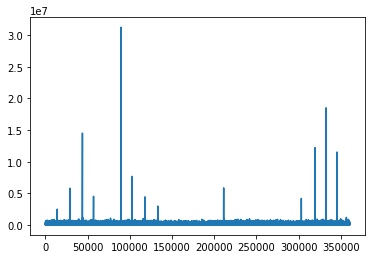

In [24]:
# Aqui hacemos la diferencia de los tiempos y luego graficamos la lista del delta de tiempo 
y=len(listadelttiem)
listadelta=[]
for i in range(y):
    if i+1 < y:
        x=listadelttiem[i+1]-listadelttiem[i]
        if x > 0 :
        #print(x)
            listadelta.append(x) #0.0010
#print("\n Los valores de la lista con la resta de los tiempos : \n", listadelta)
print("El valor maximo es: ",max(listadelta))
print("El valor minimo es: ",min(listadelta))
plot(listadelta)
show()


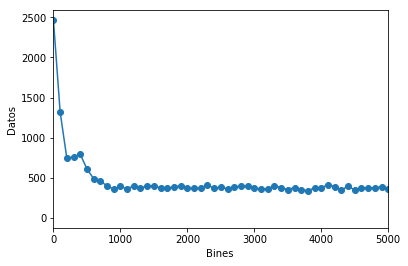

In [25]:
#Creamos el Histograma del Delta del tiempo
hist1 = [] # Array for histogram
startBin = 0
endBin = 32000000
nbins = 320000
binwidth = int((endBin - startBin) / nbins)

[hist1.append(0) for i in range(nbins)] # Inizialiting histo
#print(len(hist1))
# Filling histogram
for j in listadelta :
    hist1[ int((j)/binwidth) ] += 1



bines1=[]
[bines1.append((i)*binwidth) for i in range(nbins)]
# Histograma del criterio q/p
plot(bines1, hist1, 'o-')
xlabel('Bines ')
ylabel('Datos')
#yscale('log')
xlim(0,5000)
#ylim(1000,)
show()


# Sustentación

1) Al comienzo a cada uno de los pulsos se le quito la linea base la cual es de 50, esto con el fin de obtener el voltaje real

2) Se creo lista de lista para cada 12 bines y se hallo el pico mayor, este pico mayor es el voltaje mas alto de los 12 bines, y se guardo en una lista

3) Sumamos los voltajes para obtener la carga de cada 12 bines

4) Aplicamos el criterio P/Q>2 con el fin de saber caules de todos estos son señal y aquellos que cumplen son los tiempos que tomamos y de paso quitamos la diferencia de ruido-señal

5) Se hizo la difrencia de tiempos de aquellos que fueron señal para obtner el delta de tiempo y de este se hizo el histograma, esta grafica se limito de 0 a 5000 para una mejor observación de los bines